In [1]:
import io
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression 

###########################################################################
#generate training/test data
########################################################################### 
bragging_file = io.open("Happy_clean.txt",'r',encoding="utf-8") 
bitching_file = io.open("FML_clean.txt",'r',encoding="utf-8") 

training_samples = 30000
bragging_tweets = []
bitching_tweets = []

for _ in range(249000):
    bragging_tweets.append([bragging_file.readline().strip("\n"),0])
    bitching_tweets.append([bitching_file.readline().strip("\n"),1])
    
tweets = bragging_tweets+bitching_tweets
np.random.seed(42)
np.random.shuffle(tweets)


tweets_train = np.array(tweets[:348600])
tweets_test = np.array(tweets[348600:498000])

X_train = tweets_train[:,0]
Y_train = tweets_train[:,1]
# X_val = tweets_train[training_samples:maximum_data,0]
# Y_val = tweets_train[training_samples:maximum_data,1]
X_test = tweets_test[:,0]
Y_test = tweets_test[:,1]




### tokenizing each word in the document
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 50
training_samples = 200000
max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print ('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(Y_train)
print ("shape of the data tensor:", data.shape)
print ("shape of the label tensor: ", labels.shape)
x_train = data[:]
y_train = labels[:]

Using TensorFlow backend.


Found 271907 unique tokens.
shape of the data tensor: (348600, 50)
shape of the label tensor:  (348600,)


In [ ]:
#================== Embedding section =============#

import os

x_train = data[:]
y_train = labels[:]
# x_val = data[training_samples:]
# y_val = labels[training_samples:]

glove_dir = '/Users/hamzakhan/Desktop/Winter 2018/Hashtag_Recommendations_NN/glove.twitter.27B'
embeddings_index = {}
#your maxlen and you .txt files must correspond
f = open(os.path.join(glove_dir, 'glove.twitter.27B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs=np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.'%len(embeddings_index))

embedding_dim = maxlen
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if (i < max_words):
        embedding_vector= embeddings_index.get(word)
        if (embedding_vector is not None):
            embedding_matrix[i] = embedding_vector  

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_words,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
import keras.optimizers
sgd = keras.optimizers.SGD(lr=0.0001*400)
model.compile(optimizer = sgd,
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size= 32, validation_split = 0.05 )

Train on 331170 samples, validate on 17430 samples
Epoch 1/10
331170/331170 [==============================] - 402s 1ms/step - loss: 0.2906 - acc: 0.8747 - val_loss: 0.2290 - val_acc: 0.9061
Epoch 2/10
331170/331170 [==============================] - 410s 1ms/step - loss: 0.2192 - acc: 0.9118 - val_loss: 0.2196 - val_acc: 0.9130
Epoch 3/10
331170/331170 [==============================] - 403s 1ms/step - loss: 0.2045 - acc: 0.9187 - val_loss: 0.2574 - val_acc: 0.8893
Epoch 4/10
331170/331170 [==============================] - 405s 1ms/step - loss: 0.1957 - acc: 0.9218 - val_loss: 0.3441 - val_acc: 0.8833
Epoch 5/10
331170/331170 [==============================] - 405s 1ms/step - loss: 0.1893 - acc: 0.9252 - val_loss: 0.1986 - val_acc: 0.9221
Epoch 6/10
331170/331170 [==============================] - 406s 1ms/step - loss: 0.1846 - acc: 0.9268 - val_loss: 0.4444 - val_acc: 0.8125
Epoch 7/10
331170/331170 [==============================] - 406s 1ms/step - loss: 0.1846 - acc: 0.9269 - val_

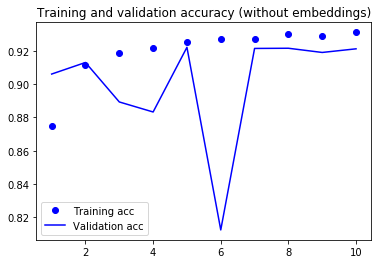

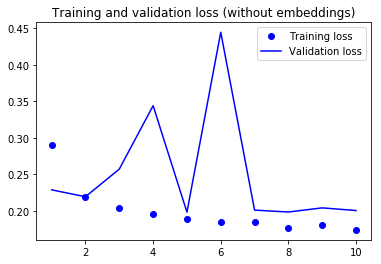

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy (without embeddings)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss (without embeddings)')
plt.legend()

plt.show()

In [9]:
sequences = tokenizer.texts_to_sequences(X_test)
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(Y_test)
model.evaluate(x_test, y_test)

149400/149400 [==============================] - 47s 316us/step


[0.19848046025318633, 0.9212851405590573]